In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train = pd.read_csv('train.csv')

In [3]:
print(train.isnull().any().describe())

count       785
unique        1
top       False
freq        785
dtype: object


In [4]:
train.shape

(42000, 785)

In [5]:
train = train.reindex(np.random.permutation(train.index))

In [6]:
train_rows = train.shape[0]

In [7]:
train_rows//4

10500

In [8]:
train.shape

(42000, 785)

In [9]:
train1 = train.iloc[:train_rows//4-5000, :]
train2 = train.iloc[train_rows//4-5000:2*train_rows//4, :]
train3 = train.iloc[2*train_rows//4:3*train_rows//4+4000, :]
train4 = train.iloc[3*train_rows//4+4000:, :]

In [10]:
train1.shape

(5500, 785)

In [11]:
n1 = len(train1)
n2 = len(train2)
n3 = len(train3)
n4 = len(train4)

<BarContainer object of 4 artists>

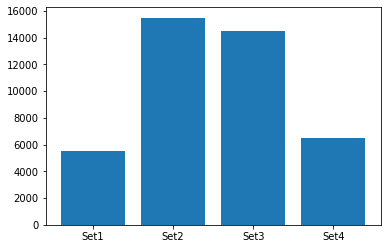

In [12]:
df = pd.Series(data=[n1, n2, n3, n4],
               index=['Set1', 'Set2', 'Set3', 'Set4'],
               name="DATA").rename_axis("Data set length", axis=0)

x = df.index
y = df.values

plt.bar(x, y)

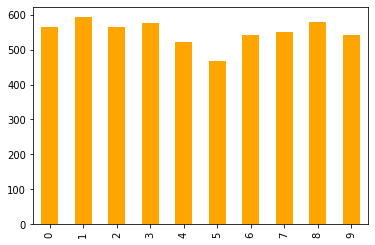

In [13]:
train1['label'].value_counts().sort_index(axis=0).plot.bar(color='orange')

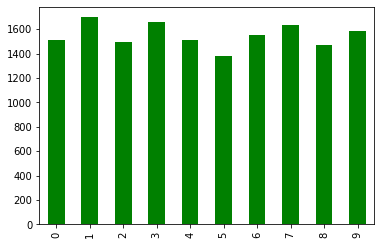

In [14]:
train2['label'].value_counts().sort_index(axis=0).plot.bar(color='green')

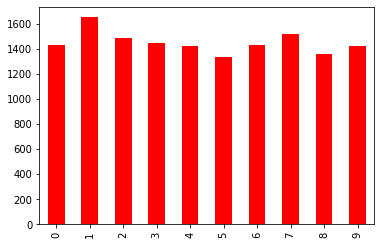

In [15]:
train3['label'].value_counts().sort_index(axis=0).plot.bar(color='red')

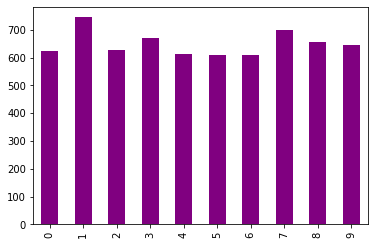

In [16]:
train4['label'].value_counts().sort_index(axis=0).plot.bar(color='purple')

In [17]:
X1 = train1.drop(labels=['label'],axis=1)
y1 = train1['label']
X2 = train2.drop(labels=['label'],axis=1)
y2 = train2['label']
X3 = train3.drop(labels=['label'],axis=1)
y3 = train3['label']
X4 = train4.drop(labels=['label'],axis=1)
y4 = train4['label']

del train1, train2, train3, train4

In [18]:
# normalizing
X1 = X1/255.0
X2 = X2/255.0
X3 = X3/255.0
X4 = X4/255.0

In [19]:
# reshaping images in 3 dimensions (height=28px, width=28px, canal=1)
X1 = X1.values.reshape(-1,28,28,1)
X2 = X2.values.reshape(-1,28,28,1)
X3 = X3.values.reshape(-1,28,28,1)
X4 = X4.values.reshape(-1,28,28,1)

In [20]:
from sklearn.model_selection import train_test_split
random_seed = 2
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=random_seed)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=random_seed)
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.1, random_state=random_seed)
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.1, random_state=random_seed)

In [21]:
def MODEL():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
    ])
    #model.summary()
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])
    return model

In [23]:
#predictions = model(x_train1[:1]).numpy()
#predictions

In [25]:
# Convert the logits into probabilities
#tf.nn.softmax(predictions).numpy()

In [26]:
#loss_fn(y_train1[:1], predictions).numpy()

In [27]:
#history = model.fit(x_train2, y_train2, validation_split=0.1, epochs=15)

In [28]:
#print(history.history.keys())

In [30]:
'''
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''

"\nplt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.title('model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()\n"

In [31]:
#model.evaluate(x_test1,  y_test1, verbose=2)

In [32]:
#predictions = model.predict(test1)

In [33]:
#print(type(predictions))
#print(predictions.shape)

In [34]:
#model.get_weights()

In [35]:
#model.fit(x_train2, y_train2, validation_split=0.1, epochs=2, verbose=0)

In [36]:
model1 = MODEL()
model2 = MODEL()
model3 = MODEL()
model4 = MODEL()

Epoch 1/2
140/140 [==============================] - 1s 2ms/step - loss: 1.4117 - accuracy: 0.5690 - val_loss: 0.4831 - val_accuracy: 0.8667
Epoch 2/2
140/140 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.8619 - val_loss: 0.3830 - val_accuracy: 0.8788
Epoch 1/2
393/393 [==============================] - 1s 1ms/step - loss: 0.9807 - accuracy: 0.7020 - val_loss: 0.3242 - val_accuracy: 0.9140
Epoch 2/2
393/393 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.9042 - val_loss: 0.2550 - val_accuracy: 0.9297
Epoch 1/2
368/368 [==============================] - 1s 2ms/step - loss: 1.0952 - accuracy: 0.6690 - val_loss: 0.3336 - val_accuracy: 0.9004
Epoch 2/2
368/368 [==============================] - 0s 1ms/step - loss: 0.3360 - accuracy: 0.9044 - val_loss: 0.2744 - val_accuracy: 0.9272
Epoch 1/2
165/165 [==============================] - 1s 2ms/step - loss: 1.4613 - accuracy: 0.5649 - val_loss: 0.4752 - val_accuracy: 0.8786
Epoch 2/2
165

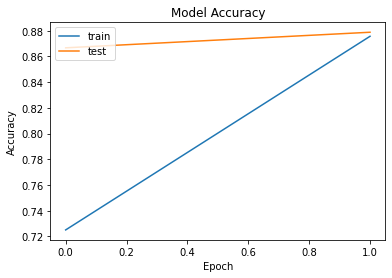

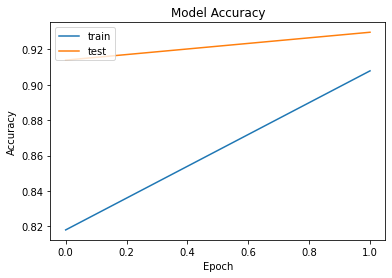

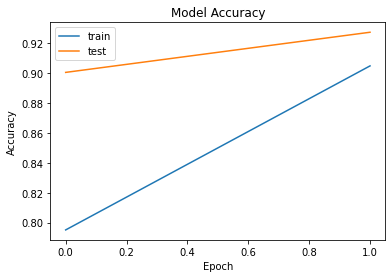

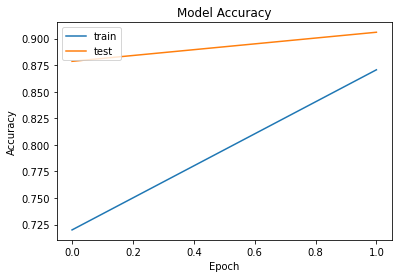

In [37]:
for i in range(1):
    h1 = model1.fit(x_train1, y_train1, validation_split=0.1, epochs=2, verbose=1)
    h2 = model2.fit(x_train2, y_train2, validation_split=0.1, epochs=2, verbose=1)
    h3 = model3.fit(x_train3, y_train3, validation_split=0.1, epochs=2, verbose=1)
    h4 = model4.fit(x_train4, y_train4, validation_split=0.1, epochs=2, verbose=1)
    
    plt.plot(h1.history['accuracy'])
    plt.plot(h1.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(h2.history['accuracy'])
    plt.plot(h2.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(h3.history['accuracy'])
    plt.plot(h3.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(h4.history['accuracy'])
    plt.plot(h4.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [38]:
model1.evaluate(x_test1,  y_test1, verbose=2)

18/18 - 0s - loss: 0.3880 - accuracy: 0.8927


[0.38798877596855164, 0.892727255821228]

In [39]:
model2.evaluate(x_test2,  y_test2, verbose=2)

49/49 - 0s - loss: 0.2895 - accuracy: 0.9200


[0.28954780101776123, 0.9200000166893005]

In [40]:
model3.evaluate(x_test3,  y_test3, verbose=2)

46/46 - 0s - loss: 0.2539 - accuracy: 0.9290


[0.25387489795684814, 0.9289655089378357]

In [41]:
model4.evaluate(x_test4,  y_test4, verbose=2)

21/21 - 0s - loss: 0.3644 - accuracy: 0.8969


[0.36441561579704285, 0.8969230651855469]

In [42]:
np.random.seed(2)

In [43]:
model1 = MODEL()
model2 = MODEL()
model3 = MODEL()
model4 = MODEL()

In [44]:
for i in range(100):
    h1 = model1.fit(x_train1, y_train1, validation_split=0.1, epochs=1, verbose=0)
    h2 = model2.fit(x_train2, y_train2, validation_split=0.1, epochs=1, verbose=0)
    h3 = model3.fit(x_train3, y_train3, validation_split=0.1, epochs=1, verbose=0)
    h4 = model4.fit(x_train4, y_train4, validation_split=0.1, epochs=1, verbose=0)
    
    wt1 = model1.get_weights()
    wt2 = model2.get_weights()
    wt3 = model3.get_weights()
    wt4 = model4.get_weights()
    
    a = np.array(wt1)
    b = np.array(wt2)
    c = np.array(wt3)
    d = np.array(wt4)
    
    mean = (a+b+c+d)/4
    
    model1.set_weights(mean)
    model2.set_weights(mean)
    model3.set_weights(mean)
    model4.set_weights(mean)
    
    '''
    plt.plot(h1.history['accuracy'])
    plt.plot(h1.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(h2.history['accuracy'])
    plt.plot(h2.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(h3.history['accuracy'])
    plt.plot(h3.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(h4.history['accuracy'])
    plt.plot(h4.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    '''
model1.evaluate(x_test1,  y_test1, verbose=2)
model2.evaluate(x_test2,  y_test2, verbose=2)
model3.evaluate(x_test3,  y_test3, verbose=2)
model4.evaluate(x_test4,  y_test4, verbose=2)

18/18 - 0s - loss: 0.1025 - accuracy: 0.9691
49/49 - 0s - loss: 0.1590 - accuracy: 0.9626
46/46 - 0s - loss: 0.1141 - accuracy: 0.9766
21/21 - 0s - loss: 0.1103 - accuracy: 0.9708


[0.11032091826200485, 0.9707692265510559]

In [45]:
model1 = MODEL()
model2 = MODEL()
model3 = MODEL()
model4 = MODEL()

In [46]:
for i in range(100):
    h1 = model1.fit(x_train1, y_train1, validation_split=0.1, epochs=1, verbose=0)
    h2 = model2.fit(x_train2, y_train2, validation_split=0.1, epochs=1, verbose=0)
    h3 = model3.fit(x_train3, y_train3, validation_split=0.1, epochs=1, verbose=0)
    h4 = model4.fit(x_train4, y_train4, validation_split=0.1, epochs=1, verbose=0)

print()
model1.evaluate(x_test1,  y_test1, verbose=2)
model2.evaluate(x_test2,  y_test2, verbose=2)
model3.evaluate(x_test3,  y_test3, verbose=2)
model4.evaluate(x_test4,  y_test4, verbose=2)


18/18 - 0s - loss: 0.3447 - accuracy: 0.9255
49/49 - 0s - loss: 0.3257 - accuracy: 0.9516
46/46 - 0s - loss: 0.2458 - accuracy: 0.9538
21/21 - 0s - loss: 0.3717 - accuracy: 0.9354


[0.371708482503891, 0.9353846311569214]

In [47]:
model1 = MODEL()
model2 = MODEL()
model3 = MODEL()
model4 = MODEL()

In [48]:
n = n1+n2+n3+n4
n1 = n1/n
n2 = n2/n
n3 = n3/n
n4 = n4/n

In [49]:
for i in range(100):
    h1 = model1.fit(x_train1, y_train1, validation_split=0.1, epochs=1, verbose=0)
    h2 = model2.fit(x_train2, y_train2, validation_split=0.1, epochs=1, verbose=0)
    h3 = model3.fit(x_train3, y_train3, validation_split=0.1, epochs=1, verbose=0)
    h4 = model4.fit(x_train4, y_train4, validation_split=0.1, epochs=1, verbose=0)
    
    wt1 = model1.get_weights()
    wt2 = model2.get_weights()
    wt3 = model3.get_weights()
    wt4 = model4.get_weights()
    
    a = np.array(wt1)
    b = np.array(wt2)
    c = np.array(wt3)
    d = np.array(wt4)
    
    mean = n1*a + n2*b + n3*c + n4*d
    
    model1.set_weights(mean)
    model2.set_weights(mean)
    model3.set_weights(mean)
    model4.set_weights(mean)

model1.evaluate(x_test1,  y_test1, verbose=2)
model2.evaluate(x_test2,  y_test2, verbose=2)
model3.evaluate(x_test3,  y_test3, verbose=2)
model4.evaluate(x_test4,  y_test4, verbose=2)

18/18 - 0s - loss: 0.1146 - accuracy: 0.9582
49/49 - 0s - loss: 0.1471 - accuracy: 0.9626
46/46 - 0s - loss: 0.1186 - accuracy: 0.9710
21/21 - 0s - loss: 0.0835 - accuracy: 0.9692


[0.08348328620195389, 0.9692307710647583]